In [ ]:
import sys
import os
build_path = os.path.join(os.getcwd(), "..", "build")
!cmake -B {build_path} -DPYTHON_EXECUTABLE={sys.executable} -Wno-dev ..
!cmake --build {build_path}
if build_path not in sys.path:
    sys.path.append(build_path)
import pypumila
# to reload pypumila, restart python kernel.
# importlib.reload(pypumila) <- does not work

In [2]:
os.chdir(build_path)
sim = pypumila.GameSim()

In [3]:
import numpy as np

In [4]:
from tqdm.notebook import tqdm

In [5]:
import random

In [6]:
model = pypumila.Pumila5.make_shared(0.01)
model_first = model.copy()
rewards = []
diffs = []
scores = []
it = 50000
with tqdm(total=it) as pbar:
    while pbar.n < it:
        sim = pypumila.GameSim()
        rnd_p = random.random()
        # print(rnd_p)
        for e in range(50):
            pbar.update()
            a = model.get_action_rnd(sim.field, rnd_p)
            model.learn_step(sim.field)
            # diff = model.mean_diff
            sim.put(pypumila.actions[a])
            while not sim.is_free_phase():
                sim.step()
            reward = pypumila.Pumila5.calc_reward(sim.field)
            rewards.append(reward)
            # diffs.append(diff)
            # このdiffはだいぶ前の学習結果で使ったdiffなので参考にならない
            #print(f"a = {a}, reward = {reward}, chain = {sim.field.prev_chain_num}, diff = {diff}")
        # print("reset sim")
        scores.append(sim.field.total_score)
        

  0%|          | 0/50000 [00:00<?, ?it/s]

In [7]:
model.save_file()

In [8]:
import matplotlib.pyplot as plt

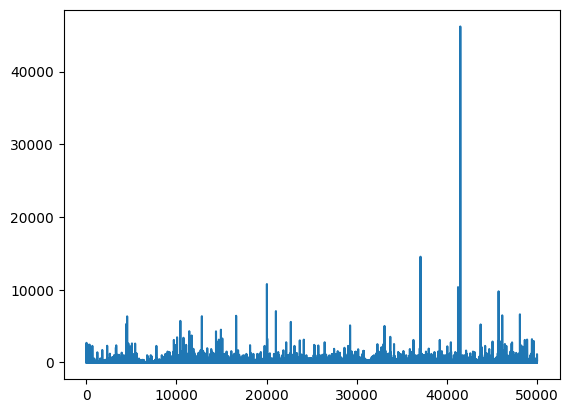

In [9]:
plt.plot(rewards)

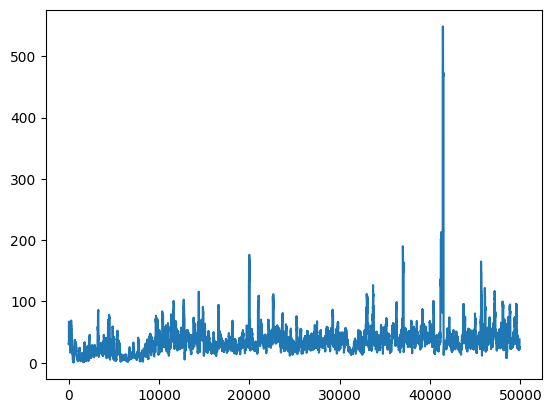

In [10]:
ar = np.array(rewards)
plt.plot([np.average(ar[i:i+100]) for i in range(len(rewards)-100)])

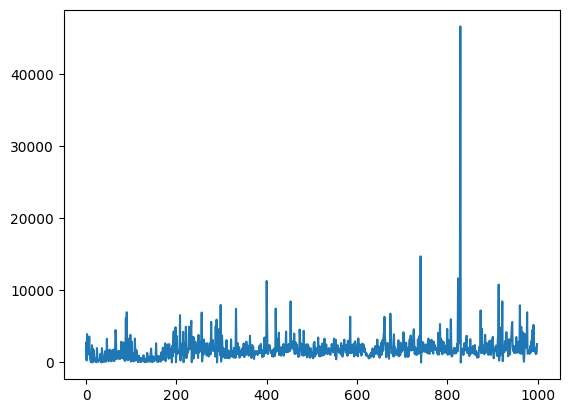

In [11]:
plt.plot(scores)

In [6]:
model = pypumila.Pumila5.make_shared(0.01)
model.load_file()

In [13]:
sim = pypumila.GameSim()
win = pypumila.Window(sim)
win.step(False)

In [14]:
while True:
    # print(model.main.forward(model.get_in_nodes(sim.field).in_nodes).q)
    a = model.get_action(sim)
    sim.put(pypumila.actions[a])
    while not sim.is_free_phase():
        win.step(True)
    for i in range(15):
        win.step(True)

KeyboardInterrupt: 

In [12]:
win.quit()